## Importing Libraries

In [1]:
import librosa as lib
import librosa.display
from librosa.core import istft
import scipy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import IPython.display as ipd
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.callbacks import * 

In [2]:
# importing emergency file:
emergency, sample_rate = lib.load('emergency.wav', sr=12000)

# importing non-emergency file:
non_emergency, sample_rate = lib.load('non emergency.wav', sr=12000)

In [3]:
len1 = lib.get_duration(emergency, sr=12000)
len2 = lib.get_duration(non_emergency, sr=12000)
print('The duration of the Emergency clip is {} mins and Non-Emergency clip is {} mins.'.format(round(len1/60,2), round(len2/60,2)))

The duration of the Emergency clip is 22.92 mins and Non-Emergency clip is 27.16 mins.


In [4]:
num_of_samples=36000
sr=12000
emergency1=[]
for i in range(0, len(emergency), sr):
    chunk = emergency[i: i+ num_of_samples]
    if(len(chunk)==36000):
        emergency1.append(chunk)


In [5]:
num_of_samples=36000
sr=12000
non_emergency1=[]
for i in range(0, len(non_emergency), sr):
    chunk = non_emergency[i: i+ num_of_samples]
    if(len(chunk)==36000):
        non_emergency1.append(chunk)

In [6]:
#printing the number of chuncks based on the previous for loop
print('The number of chunks of Emergency is {} and Non-Emergency is {}.'.format(len(emergency1), len(non_emergency1)))

The number of chunks of Emergency is 1373 and Non-Emergency is 1627.


In [7]:
#Playing Emergency Sound:
ipd.Audio(emergency1[30], rate=12000)

In [8]:
#Playing Non-Emergency Sound:
ipd.Audio(non_emergency1[50], rate=12000)

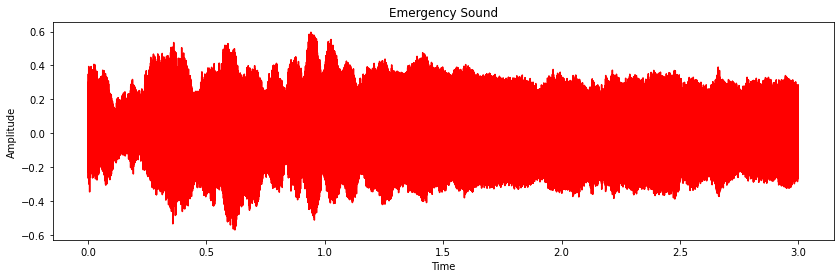

In [9]:
#Visualizing Emergency Signals
plt.figure(figsize=(14,4))
plt.plot(np.linspace(0, 3, num=36000),emergency1[30],c='r')
plt.title('Emergency Sound')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

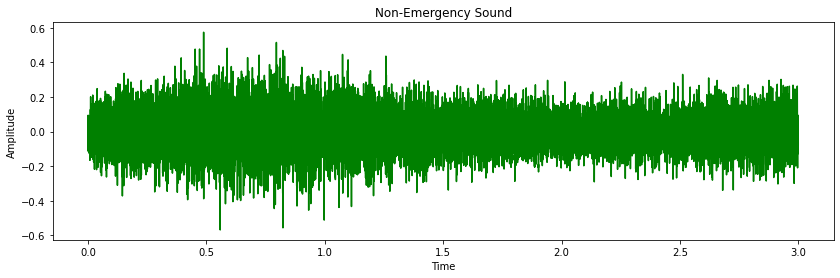

In [10]:
#Visualizing Non-Emergency Signals
plt.figure(figsize=(14,4))
plt.plot(np.linspace(0, 3, num=36000),non_emergency1[50],c='g')
plt.title('Non-Emergency Sound')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#### Combining the data and adding lables

In [188]:
#Combining the Emergency and Non Emergency audio chunks
audio = np.concatenate([emergency1,non_emergency1])
#Assigning labels 
labels1 = np.zeros(len(emergency1))
labels2 = np.ones(len(non_emergency1))
#concatenate labels
labels = np.concatenate([labels1,labels2])
print('The shape of the combined audio data is {}' .format(audio.shape))

The shape of the combined audio data is (3000, 36000)


In [36]:
audio.shape

(3000, 36000)

In [37]:
labels1.shape

(1373,)

In [38]:
labels2.shape

(1627,)

#### Splitting the data into 3 sets (train, validation, and test)

In [12]:
# Train-test splitting:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(audio), np.array(labels), stratify=labels, test_size=0.20, 
                                                    random_state=12, shuffle=True)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('')
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (2400, 36000)
X_test (600, 36000)

Y_train (2400,)
Y_test (600,)


In [13]:
# Train-validation splitting:
X_train1, X_val, Y_train1, Y_val = train_test_split(X_train, Y_train, test_size=0.20,random_state=12)
print('X_train', X_train1.shape)
print('X_val', X_val.shape)
print('')
print('Y_train', Y_train1.shape)
print('Y_val', Y_val.shape)

X_train (1920, 36000)
X_val (480, 36000)

Y_train (1920,)
Y_val (480,)


In [ ]:
#X_train1
#X_val
#Y_train1
#Y_val
#X_test
#Y_test

In [14]:
# Reshaping the 2-Dimensional array into 3-Dimensional array by setting the third dimension to 1:
X_train_features = X_train1.reshape(len(X_train1),-1,1)
X_val_features = X_val.reshape(len(X_val),-1,1)
X_test_features = X_test.reshape(len(X_test), -1,1)
print('The reshaped X_train array has size:', X_train_features.shape)
print('The reshaped X_val array has size:', X_val_features.shape)
print('The reshaped X_test array has size:', X_test_features.shape)

The reshaped X_train array has size: (1920, 36000, 1)
The reshaped X_val array has size: (480, 36000, 1)
The reshaped X_test array has size: (600, 36000, 1)


### Spectogram Visualization

In [15]:
def spec_log(audio, sample_rate, eps = 1e-10):
    
    freq, times, spec = scipy.signal.spectrogram(audio, fs= sample_rate, nperseg=320, noverlap=160)
    return freq, times, np.log(spec.T.astype(np.float32) + eps)

In [16]:
def spec_plot(spectrogram, label):
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(211)
    ax.imshow(spectrogram.T, aspect='auto', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax.set_title('Spectrogram of '+label)
    ax.set_xlabel('Seconds')
    ax.set_ylabel('Freqs in Hz')
    plt.show()

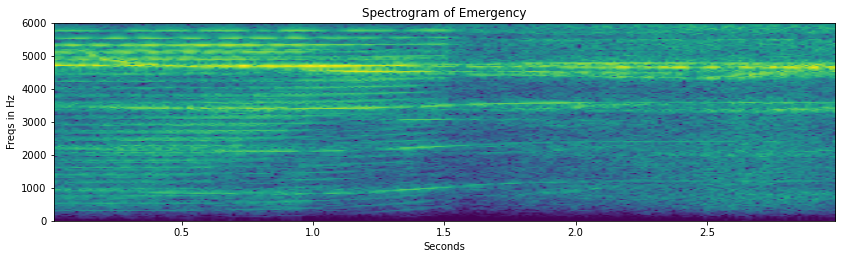

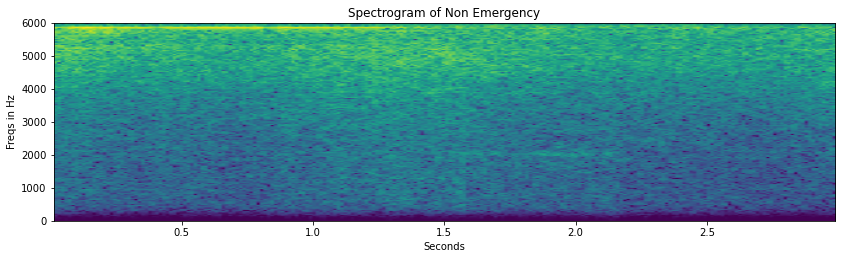

In [17]:
#Visualizing the Spectrogram for Emergency:
freqs, times, spectrogram = spec_log(emergency1[162], sample_rate)
spec_plot(spectrogram,"Emergency")
#Visualizing the Spectrogram for Non-Emergency:
freqs, times, spectrogram = spec_log(non_emergency1[162], sample_rate)
spec_plot(spectrogram,"Non Emergency")

### Chromagram

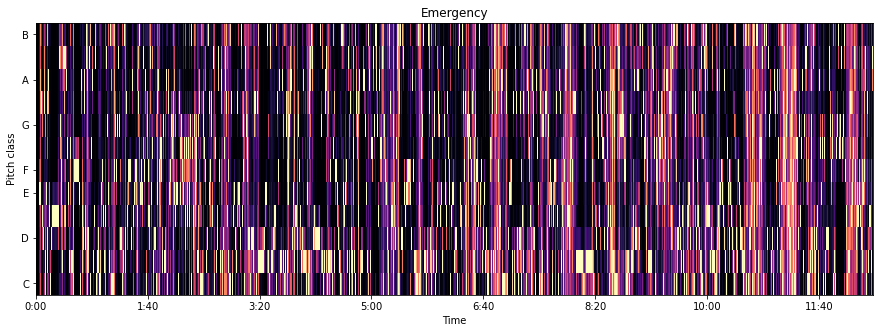

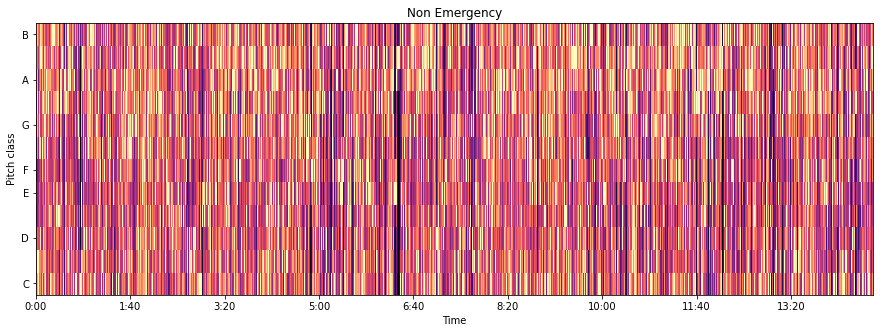

In [18]:
#Emergency Sound Chromagrams
y, sr = librosa.load('emergency.wav',12000)
Chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.title('Emergency')
librosa.display.specshow(Chromagram, x_axis='time', y_axis='chroma')

#non-Emergency Sound Chromagrams
y1, sr1 = librosa.load('non emergency.wav',12000)
Chromagram1 = librosa.feature.chroma_stft(y=y1, sr=sr1)
plt.figure(figsize=(15,5))
plt.title('Non Emergency')
librosa.display.specshow(Chromagram1, x_axis='time', y_axis='chroma')




In [170]:
vocals = istft(audio)
Chromagrams = librosa.feature.chroma_stft(y=vocals, sr=sr)

In [180]:
emergency11 = np.array(emergency1)

In [181]:
non_emergency11 = np.array(non_emergency1)

In [182]:
vocals1 = istft(emergency11)
Chromagram_emergency = librosa.feature.chroma_stft(y=vocals1, sr=12000)

In [183]:
vocals2 = istft(non_emergency11)
Chromagrams_nonemergency = librosa.feature.chroma_stft(y=vocals2, sr=12000)

In [179]:
Chromagram_emergency.shape

NameError: name 'Chromagram_emergency' is not defined

In [184]:
audio2 = np.concatenate([Chromagram_emergency,Chromagrams_nonemergency])
labels1 = np.zeros(len(Chromagram_emergency))
labels2 = np.ones(len(Chromagrams_nonemergency))
labels = np.concatenate([labels1,labels2])
print('The shape of the combined audio data is {}' .format(audio.shape))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 48234 and the array at index 1 has size 57163

In [185]:
Chromagram_emergency.shape

(12, 48234)

In [187]:
Chromagrams_nonemergency.shape

(12, 57163)

### Feeding Chromagram into a model

In [190]:
# Train-test splitting:
X_train_chrom, X_test_chrom, Y_train_chrom, Y_test_chrom = train_test_split(Chromagram_emergency, np.array(labels), stratify=labels, test_size=0.20, 
                                                    random_state=12, shuffle=True)
print('X_train', X_train_chrom.shape)
print('X_test', X_test_chrom.shape)
print('')
print('Y_train', Y_train_chrom.shape)
print('Y_test', Y_test_chrom.shape)

ValueError: Found input variables with inconsistent numbers of samples: [12, 3000]

#### This experiment failed as there is an error with the dimensions created from both files (emergency and non-emergency)

### CNN Model

In [105]:
inputs = Input(shape= (X_train_features.shape[1], X_train_features.shape[2]))
conv = Conv1D(5,13, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(10,11, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(15,9, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = GlobalMaxPool1D()(conv)
conv = Dense(16, activation='relu')(conv)
outputs = Dense(1,activation='sigmoid')(conv)
model = Model(inputs, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['acc'])
model_checkpoint = ModelCheckpoint('best_model_cnn.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [106]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36000, 1)]        0         
                                                                 
 conv1d_2 (Conv1D)           (None, 36000, 15)         150       
                                                                 
 dropout_2 (Dropout)         (None, 36000, 15)         0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 18000, 15)        0         
 1D)                                                             
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 16)                256   

In [107]:
history = model.fit(X_train_features, Y_train1 ,epochs=10, callbacks=[model_checkpoint], batch_size=32, 
                    validation_data=(X_val_features, Y_val))
model.load_weights('best_model_cnn.hdf5')

Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 0.6667 - acc: 0.5922
Epoch 00001: val_loss improved from inf to 0.67352, saving model to best_model_cnn.hdf5
60/60 [==============================] - 40s 629ms/step - loss: 0.6667 - acc: 0.5922 - val_loss: 0.6735 - val_acc: 0.7000
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.6142 - acc: 0.7396
Epoch 00002: val_loss improved from 0.67352 to 0.65194, saving model to best_model_cnn.hdf5
60/60 [==============================] - 37s 620ms/step - loss: 0.6142 - acc: 0.7396 - val_loss: 0.6519 - val_acc: 0.7625
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.5756 - acc: 0.7594
Epoch 00003: val_loss improved from 0.65194 to 0.63128, saving model to best_model_cnn.hdf5
60/60 [==============================] - 37s 616ms/step - loss: 0.5756 - acc: 0.7594 - val_loss: 0.6313 - val_acc: 0.7542
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 0.5559 - acc: 0.7578
Epoch 

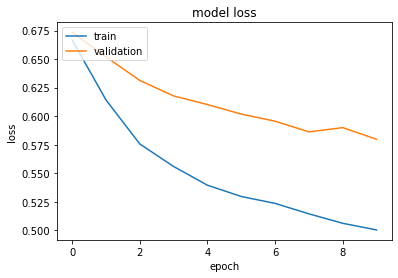

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [109]:
_, acc = model.evaluate(X_test_features, Y_test)
print("Validation Accuracy:",acc)

19/19 [==============================] - 3s 114ms/step - loss: 0.5938 - acc: 0.7500
Validation Accuracy: 0.75


In [110]:
# For Prediction: the input audio
index = 98
test_audio = X_test[index]
ipd.Audio(test_audio, rate=12000)
feature = X_test_features[index]
prob = model.predict(feature.reshape(1,-1,1))
if (prob[0][0] < 0.5):
    pred='emergency'
else:
    pred='non emergency' 
print("Prediction:",pred)

Prediction: non emergency


### CNN 2

In [232]:
inputs = Input(shape= (X_train_features.shape[1], X_train_features.shape[2]))
conv = Conv1D(5,13, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(10,11, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(15,9, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(20,9, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(20,9, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = GlobalMaxPool1D()(conv)
conv = Dense(16, activation='relu')(conv)
outputs = Dense(1,activation='sigmoid')(conv)
model = Model(inputs, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['acc'])
model_checkpoint = ModelCheckpoint('best_model_cnn.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [233]:
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 36000, 1)]        0         
                                                                 
 conv1d_49 (Conv1D)          (None, 36000, 20)         200       
                                                                 
 dropout_65 (Dropout)        (None, 36000, 20)         0         
                                                                 
 max_pooling1d_49 (MaxPoolin  (None, 18000, 20)        0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_11 (Gl  (None, 20)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_32 (Dense)            (None, 16)                336

In [235]:
history = model.fit(X_train_features, Y_train1 ,epochs=15, callbacks=[model_checkpoint], batch_size=32, 
                    validation_data=(X_val_features, Y_val))

model.load_weights('best_model_cnn.hdf5')

Epoch 1/15
60/60 [==============================] - ETA: 0s - loss: 0.4366 - acc: 0.8016
Epoch 00001: val_loss improved from 0.52646 to 0.52205, saving model to best_model_cnn.hdf5
60/60 [==============================] - 45s 753ms/step - loss: 0.4366 - acc: 0.8016 - val_loss: 0.5221 - val_acc: 0.8021
Epoch 2/15
60/60 [==============================] - ETA: 0s - loss: 0.4277 - acc: 0.8010
Epoch 00002: val_loss improved from 0.52205 to 0.51831, saving model to best_model_cnn.hdf5
60/60 [==============================] - 44s 737ms/step - loss: 0.4277 - acc: 0.8010 - val_loss: 0.5183 - val_acc: 0.8021
Epoch 3/15
60/60 [==============================] - ETA: 0s - loss: 0.4233 - acc: 0.8021
Epoch 00003: val_loss improved from 0.51831 to 0.51373, saving model to best_model_cnn.hdf5
60/60 [==============================] - 43s 716ms/step - loss: 0.4233 - acc: 0.8021 - val_loss: 0.5137 - val_acc: 0.8042
Epoch 4/15
60/60 [==============================] - ETA: 0s - loss: 0.4153 - acc: 0.8073
Ep

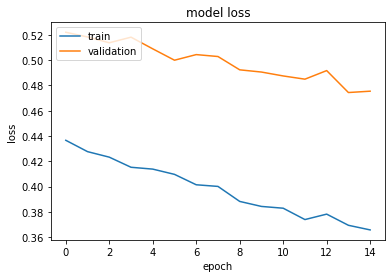

In [237]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [238]:
_, acc = model.evaluate(X_test_features, Y_test)
print("Validation Accuracy:",acc)

19/19 [==============================] - 3s 129ms/step - loss: 0.4968 - acc: 0.7850
Validation Accuracy: 0.7850000262260437


In [115]:
# For Prediction: the input audio
index = 98
test_audio = X_test[index]
ipd.Audio(test_audio, rate=12000)
feature = X_test_features[index]
prob = model.predict(feature.reshape(1,-1,1))
if (prob[0][0] < 0.5):
    pred='emergency'
else:
    pred='non emergency' 
print("Prediction:",pred)

Prediction: non emergency


## CNN with 30 epochs

In [227]:
inputs = Input(shape= (X_train_features.shape[1], X_train_features.shape[2]))
conv = Conv1D(5,13, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(10,11, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(15,9, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(20,9, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(20,9, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = GlobalMaxPool1D()(conv)
conv = Dense(16, activation='relu')(conv)
outputs = Dense(1,activation='sigmoid')(conv)
model = Model(inputs, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['acc'])
model_checkpoint = ModelCheckpoint('best_model_cnn.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [228]:
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 36000, 1)]        0         
                                                                 
 conv1d_44 (Conv1D)          (None, 36000, 20)         200       
                                                                 
 dropout_60 (Dropout)        (None, 36000, 20)         0         
                                                                 
 max_pooling1d_44 (MaxPoolin  (None, 18000, 20)        0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_10 (Gl  (None, 20)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_30 (Dense)            (None, 16)                336

In [229]:
history = model.fit(X_train_features, Y_train1 ,epochs=30, callbacks=[model_checkpoint], batch_size=32, 
                    validation_data=(X_val_features, Y_val))

model.load_weights('best_model_cnn.hdf5')

Epoch 1/30
60/60 [==============================] - ETA: 0s - loss: 0.6735 - acc: 0.5953
Epoch 00001: val_loss improved from inf to 0.67889, saving model to best_model_cnn.hdf5
60/60 [==============================] - 35s 547ms/step - loss: 0.6735 - acc: 0.5953 - val_loss: 0.6789 - val_acc: 0.7750
Epoch 2/30
60/60 [==============================] - ETA: 0s - loss: 0.6348 - acc: 0.7490
Epoch 00002: val_loss improved from 0.67889 to 0.66177, saving model to best_model_cnn.hdf5
60/60 [==============================] - 29s 476ms/step - loss: 0.6348 - acc: 0.7490 - val_loss: 0.6618 - val_acc: 0.7750
Epoch 3/30
60/60 [==============================] - ETA: 0s - loss: 0.6016 - acc: 0.7604
Epoch 00003: val_loss improved from 0.66177 to 0.64518, saving model to best_model_cnn.hdf5
60/60 [==============================] - 28s 474ms/step - loss: 0.6016 - acc: 0.7604 - val_loss: 0.6452 - val_acc: 0.7792
Epoch 4/30
60/60 [==============================] - ETA: 0s - loss: 0.5810 - acc: 0.7563
Epoch 

Epoch 29/30
60/60 [==============================] - ETA: 0s - loss: 0.4220 - acc: 0.7943
Epoch 00029: val_loss did not improve from 0.50548
60/60 [==============================] - 29s 480ms/step - loss: 0.4220 - acc: 0.7943 - val_loss: 0.5113 - val_acc: 0.8021
Epoch 30/30
60/60 [==============================] - ETA: 0s - loss: 0.4170 - acc: 0.8000
Epoch 00030: val_loss did not improve from 0.50548
60/60 [==============================] - 29s 476ms/step - loss: 0.4170 - acc: 0.8000 - val_loss: 0.5102 - val_acc: 0.8021


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# For Prediction: the input audio
index = 98
test_audio = X_test[index]
ipd.Audio(test_audio, rate=12000)
feature = X_test_features[index]
prob = model.predict(feature.reshape(1,-1,1))
if (prob[0][0] < 0.5):
    pred='emergency'
else:
    pred='non emergency' 
print("Prediction:",pred)

### SVM

In [239]:
from sklearn.metrics import accuracy_score
from sklearn import svm
model = svm.SVC(kernel = 'rbf', C = 1)
model1 = model.fit(X_train1,Y_train1)
model1.score(X_train1,Y_train1)
predicted=model.predict(X_test)
accuracy_score(Y_test,predicted)

0.6733333333333333

In [240]:
model1.score(X_train1,Y_train1)

0.8223958333333333

In [248]:
from sklearn.metrics import accuracy_score
from sklearn import svm
model = svm.SVC(kernel = 'rbf', C = 3)
model1 = model.fit(X_train1,Y_train1)
predicted=model.predict(X_test)

In [249]:
model1.score(X_train1,Y_train1)

1.0

In [250]:
accuracy_score(Y_test,predicted)

0.4533333333333333

In [251]:
from sklearn.metrics import accuracy_score
from sklearn import svm
model = svm.SVC(kernel = 'rbf', C = 2)
model1 = model.fit(X_train1,Y_train1)
predicted=model.predict(X_test)

In [252]:
model1.score(X_train1,Y_train1)

0.9927083333333333

In [253]:
accuracy_score(Y_test,predicted)

0.4683333333333333

### LSTM

In [116]:
# Reshaping the Audio chunks:
X_train_features1 = X_train1.reshape(len(X_train1),-1,160)
X_val_features1 = X_val.reshape(len(X_val),-1,160)
X_test_features1 = X_test.reshape(len(X_test), -1,160)
print('The reshaped X_train array has size:', X_train_features1.shape)
print('The reshaped X_val array has size:', X_val_features1.shape)
print('The reshaped X_test array has size:', X_test_features1.shape)

The reshaped X_train array has size: (1920, 225, 160)
The reshaped X_val array has size: (480, 225, 160)
The reshaped X_test array has size: (600, 225, 160)


In [117]:
inputs = Input(shape=(X_train_features1.shape[1], X_train_features1.shape[2]))
x = LSTM(128)(inputs)
x = Dropout(0.7)(x)
x = LSTM(128)(inputs)
x = Dropout(0.7)(x)
x = LSTM(64)(inputs)
x = Dropout(0.7)(x)
x = LSTM(64)(inputs)
x = Dropout(0.7)(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs, x)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

mc = ModelCheckpoint('best_model_lstm.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [118]:
# model training
m = model.fit(X_train_features1, Y_train1 ,epochs=10, callbacks=mc, batch_size=32, 
                    validation_data=(X_val_features1, Y_val))

Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 0.6886 - acc: 0.5349
Epoch 00001: val_loss improved from inf to 0.68239, saving model to best_model_lstm.hdf5
60/60 [==============================] - 16s 198ms/step - loss: 0.6886 - acc: 0.5349 - val_loss: 0.6824 - val_acc: 0.5562
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.6482 - acc: 0.6443- 
Epoch 00002: val_loss improved from 0.68239 to 0.67650, saving model to best_model_lstm.hdf5
60/60 [==============================] - 10s 170ms/step - loss: 0.6482 - acc: 0.6443 - val_loss: 0.6765 - val_acc: 0.5875
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.6308 - acc: 0.6729
Epoch 00003: val_loss improved from 0.67650 to 0.58486, saving model to best_model_lstm.hdf5
60/60 [==============================] - 10s 160ms/step - loss: 0.6308 - acc: 0.6729 - val_loss: 0.5849 - val_acc: 0.7229
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 0.5134 - acc: 0.7797
E

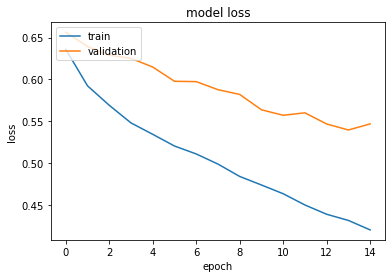

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [120]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 225, 160)]        0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                57600     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 61,825
Trainable params: 61,825
Non-trainable params: 0
_________________________________________________________________


In [121]:
_,acc = model.evaluate(X_test_features1, Y_test)
print("Accuracy:",acc)

19/19 [==============================] - 2s 70ms/step - loss: 0.4489 - acc: 0.8050
Accuracy: 0.8050000071525574


In [122]:
# For Prediction using LSTM: the input audio
index = 51
test_audio = X_test[index]
ipd.Audio(test_audio, rate=12000)

feature = X_test_features1[index]
prob = model.predict(feature.reshape(1,-1,160))
if (prob[0][0] < 0.5):
    pred='emergency vehicle'
else:
    pred='non emergency vehicle' 
print("Prediction:",pred)

Prediction: non emergency vehicle


### LSTM 2

In [123]:
inputs = Input(shape=(X_train_features1.shape[1], X_train_features1.shape[2]))
x = LSTM(128)(inputs)
x = Dropout(0.7)(x)
x = LSTM(128)(inputs)
x = Dropout(0.7)(x)
x = LSTM(64)(inputs)
x = Dropout(0.7)(x)
x = LSTM(64)(inputs)
x = Dropout(0.7)(x)
x = LSTM(64)(inputs)
x = Dropout(0.7)(x)
x = LSTM(50)(inputs)
x = Dropout(0.7)(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs, x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
mc = ModelCheckpoint('best_model_lstm.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [124]:
# model training
m = model.fit(X_train_features1, Y_train1 ,epochs=10, callbacks=mc, batch_size=32, 
                    validation_data=(X_val_features1, Y_val))


Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 0.6917 - acc: 0.5125
Epoch 00001: val_loss improved from inf to 0.68621, saving model to best_model_lstm.hdf5
60/60 [==============================] - 14s 172ms/step - loss: 0.6917 - acc: 0.5125 - val_loss: 0.6862 - val_acc: 0.5583
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.6635 - acc: 0.6172
Epoch 00002: val_loss improved from 0.68621 to 0.59976, saving model to best_model_lstm.hdf5
60/60 [==============================] - 9s 147ms/step - loss: 0.6635 - acc: 0.6172 - val_loss: 0.5998 - val_acc: 0.7250
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.6086 - acc: 0.7276
Epoch 00003: val_loss did not improve from 0.59976
60/60 [==============================] - 9s 150ms/step - loss: 0.6086 - acc: 0.7276 - val_loss: 0.6113 - val_acc: 0.7063
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 0.5895 - acc: 0.7229
Epoch 00004: val_loss improved from 0.59976 to 

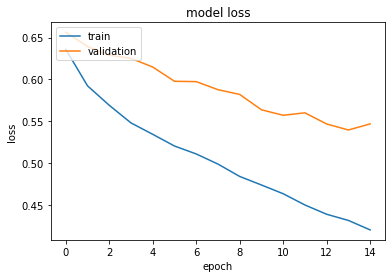

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [126]:
# Model Evaluation:
_,acc = model.evaluate(X_test_features1, Y_test)
print("Accuracy:",acc)

19/19 [==============================] - 2s 65ms/step - loss: 0.6010 - acc: 0.6950
Accuracy: 0.6949999928474426


In [127]:
# For Prediction using LSTM: the input audio
index = 51
test_audio = X_test[index]

ipd.Audio(test_audio, rate=12000)

feature = X_test_features1[index]
prob = model.predict(feature.reshape(1,-1,160))
if (prob[0][0] < 0.5):
    pred='emergency vehicle'
else:
    pred='non emergency vehicle' 
print("Prediction:",pred)

Prediction: non emergency vehicle


### LSTM 3

In [129]:
inputs = Input(shape=(X_train_features1.shape[1], X_train_features1.shape[2]))
x = LSTM(128)(inputs)
x = LSTM(128)(inputs)
x = LSTM(64)(inputs)
x = LSTM(64)(inputs)
x = LSTM(64)(inputs)
x = Dropout(0.7)(x)
x = LSTM(64)(inputs)
x = Dense(64, activation = 'relu')(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs, x)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

mc = ModelCheckpoint('best_model_lstm.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [130]:
# model training
m = model.fit(X_train_features1, Y_train1 ,epochs=10, callbacks=mc, batch_size=32, 
                    validation_data=(X_val_features1, Y_val))


Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 0.6831 - acc: 0.5833
Epoch 00001: val_loss improved from inf to 0.67042, saving model to best_model_lstm.hdf5
60/60 [==============================] - 14s 175ms/step - loss: 0.6831 - acc: 0.5833 - val_loss: 0.6704 - val_acc: 0.5750
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.6362 - acc: 0.6854
Epoch 00002: val_loss improved from 0.67042 to 0.60329, saving model to best_model_lstm.hdf5
60/60 [==============================] - 10s 159ms/step - loss: 0.6362 - acc: 0.6854 - val_loss: 0.6033 - val_acc: 0.7104
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.5495 - acc: 0.7516
Epoch 00003: val_loss improved from 0.60329 to 0.53785, saving model to best_model_lstm.hdf5
60/60 [==============================] - 10s 161ms/step - loss: 0.5495 - acc: 0.7516 - val_loss: 0.5378 - val_acc: 0.7583
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 0.5690 - acc: 0.6990
Epo

In [131]:
# Model Evaluation:
_,acc = model.evaluate(X_test_features1, Y_test)
print("Accuracy:",acc)

19/19 [==============================] - 2s 69ms/step - loss: 0.4228 - acc: 0.8183
Accuracy: 0.8183333277702332


### Feature Extraction

In [132]:
def spec_log(audio, sample_rate, eps = 1e-10):
    
    freq, times, spec = scipy.signal.spectrogram(audio, fs= sample_rate, nperseg=320, noverlap=160)
    return freq, times, np.log(spec.T.astype(np.float32) + eps)

In [133]:
def spec_plot(spectrogram, label):
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(211)
    ax.imshow(spectrogram.T, aspect='auto', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax.set_title('Spectrogram of '+label)
    ax.set_xlabel('Seconds')
    ax.set_ylabel('Freqs in Hz')
    plt.show()

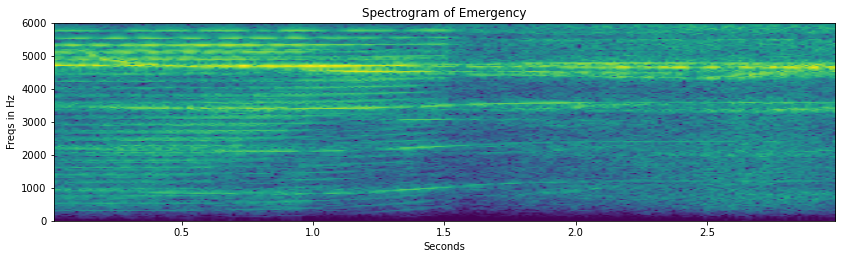

In [135]:
freqs, times, spectrogram = spec_log(emergency1[162], sample_rate)
spec_plot(spectrogram,"Emergency")

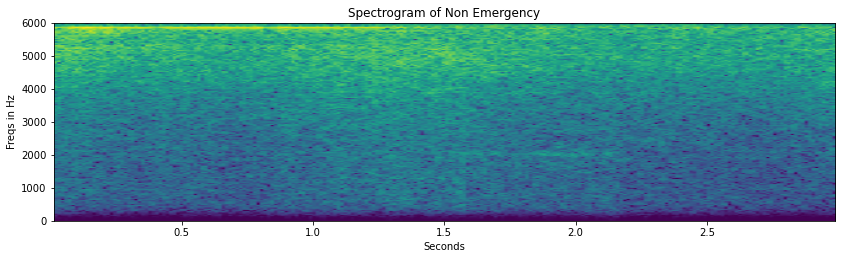

In [136]:
freqs, times, spectrogram = spec_log(non_emergency1[162], sample_rate)
spec_plot(spectrogram,"Non Emergency")

In [137]:
def extract_spec_features(X_tr):
    
    # defining empty list to store the features:
    features = []
    
    # We only need the 3rd array of Spectrogram so assigning the first two arrays as _
    for i in X_tr:
        _,_, spectrogram = spec_log(i, sample_rate)

        mean = np.mean(spectrogram, axis=0)
        std = np.std(spectrogram, axis=0)
        spectrogram = (spectrogram - mean)/std

        features.append(spectrogram)
    
    # returning the features as array
    return np.array(features)

In [154]:
X_train_features2 = extract_spec_features(X_train1)
X_test_features2 = extract_spec_features(X_test)

## CNN after feature extraction

In [241]:
inputs = Input(shape= (X_train_features2.shape[1], X_train_features2.shape[2]))
conv = Conv1D(5,13, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(10,11, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(15,9, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(20,9, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(20,9, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = GlobalMaxPool1D()(conv)
conv = Dense(16, activation='relu')(conv)
outputs = Dense(1,activation='sigmoid')(conv)
model = Model(inputs, outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['acc'])

model_checkpoint = ModelCheckpoint('best_model_cnn.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [242]:
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 161)]        0         
                                                                 
 conv1d_54 (Conv1D)          (None, 224, 20)           29000     
                                                                 
 dropout_70 (Dropout)        (None, 224, 20)           0         
                                                                 
 max_pooling1d_54 (MaxPoolin  (None, 112, 20)          0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_12 (Gl  (None, 20)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_34 (Dense)            (None, 16)                336

In [243]:
history=model.fit(X_train_features2, Y_train1, epochs=10, batch_size=32, 
                    validation_data=(X_test_features2, Y_test))

Epoch 1/10
60/60 [==============================] - 29s 402ms/step - loss: 1.7640 - acc: 0.6026 - val_loss: 0.5406 - val_acc: 0.7783
Epoch 2/10
60/60 [==============================] - 3s 54ms/step - loss: 0.4302 - acc: 0.8125 - val_loss: 0.4571 - val_acc: 0.8417
Epoch 3/10
60/60 [==============================] - 3s 54ms/step - loss: 0.3047 - acc: 0.8792 - val_loss: 0.3999 - val_acc: 0.8583
Epoch 4/10
60/60 [==============================] - 3s 56ms/step - loss: 0.2276 - acc: 0.9094 - val_loss: 0.3643 - val_acc: 0.8900
Epoch 5/10
60/60 [==============================] - 3s 53ms/step - loss: 0.1767 - acc: 0.9286 - val_loss: 0.3318 - val_acc: 0.8983
Epoch 6/10
60/60 [==============================] - 3s 54ms/step - loss: 0.1169 - acc: 0.9563 - val_loss: 0.2965 - val_acc: 0.9267
Epoch 7/10
60/60 [==============================] - 3s 56ms/step - loss: 0.1059 - acc: 0.9630 - val_loss: 0.2750 - val_acc: 0.9283
Epoch 8/10
60/60 [==============================] - 3s 57ms/step - loss: 0.0706 -

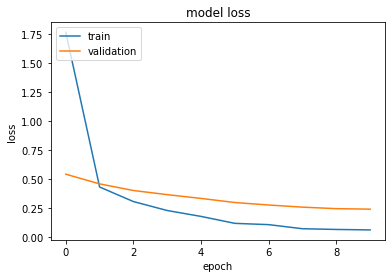

In [244]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [245]:
# model's performance on the test set:
_,acc = model.evaluate(X_test_features2, Y_test)
print("Accuracy:",acc)

19/19 [==============================] - 0s 13ms/step - loss: 0.2393 - acc: 0.9233
Accuracy: 0.9233333468437195


## LSTM

In [164]:
inputs = Input(shape=(X_train_features2.shape[1], X_train_features2.shape[2]))
x = LSTM(128)(inputs)
x = Dropout(0.7)(x)
x = LSTM(128)(inputs)
x = Dropout(0.7)(x)
x = LSTM(64)(inputs)
x = Dropout(0.7)(x)
x = LSTM(64)(inputs)
x = Dropout(0.7)(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs, x)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

mc = ModelCheckpoint('best_model_lstm.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [165]:
# model training
m = model.fit(X_train_features2, Y_train1 ,epochs=10, callbacks=mc, batch_size=32, 
                    validation_data=(X_test_features2, Y_test))


Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 0.7037 - acc: 0.5271
Epoch 00001: val_loss improved from inf to 0.66564, saving model to best_model_lstm.hdf5
60/60 [==============================] - 15s 197ms/step - loss: 0.7037 - acc: 0.5271 - val_loss: 0.6656 - val_acc: 0.6300
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.6530 - acc: 0.6177
Epoch 00002: val_loss improved from 0.66564 to 0.63160, saving model to best_model_lstm.hdf5
60/60 [==============================] - 11s 184ms/step - loss: 0.6530 - acc: 0.6177 - val_loss: 0.6316 - val_acc: 0.6817
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.5646 - acc: 0.7214
Epoch 00003: val_loss improved from 0.63160 to 0.51367, saving model to best_model_lstm.hdf5
60/60 [==============================] - 11s 179ms/step - loss: 0.5646 - acc: 0.7214 - val_loss: 0.5137 - val_acc: 0.7767
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 0.4437 - acc: 0.8344
Epo

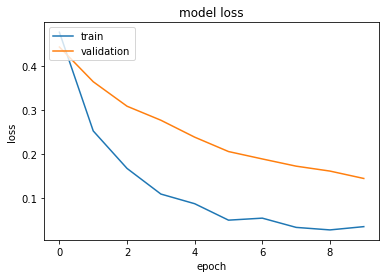

In [166]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [167]:
# Model Evaluation:
_,acc = model.evaluate(X_test_features2, Y_test)
print("Accuracy:",acc)

19/19 [==============================] - 2s 77ms/step - loss: 0.2480 - acc: 0.9150
Accuracy: 0.9150000214576721


### Trying Pitch (Feature Extraction)

In [ ]:
#X_train1
#X_val
#Y_train1
#Y_val
#X_test
#Y_test

In [215]:
def extract_pitch(X_tr):
    
    # defining empty list to store the features:
    features = []
    
    # We only need the 3rd array of Spectrogram so assigning the first two arrays as _
    for i in X_tr:
        pitches, magnitudes = librosa.piptrack(i, sample_rate)

        mean = np.mean(pitches, axis=0)
        std = np.std(pitches, axis=0)
        spectrogram = (pitches - mean)/std

        features.append(pitches)
    
    # returning the features as array
    return np.array(features)

In [216]:
pitches_xtrain_features = extract_pitch(X_train1)

In [217]:
pitches_xtest_features = extract_pitch(X_test)

In [218]:
pitches_xtrain_features.shape

(1920, 1025, 71)

In [219]:
pitches_xtest_features.shape

(600, 1025, 71)

In [220]:
Y_train1.shape

(1920,)

#### Training a CNN model using the extracted features

In [224]:
inputs = Input(shape= (pitches_xtrain_features.shape[1], pitches_xtrain_features.shape[2]))
conv = Conv1D(5,13, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(10,11, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = Conv1D(15,9, padding='same', activation='relu')(inputs)
conv = Dropout(0.7)(conv)
conv = MaxPooling1D(2)(conv)
conv = GlobalMaxPool1D()(conv)
conv = Dense(16, activation='relu')(conv)
outputs = Dense(1,activation='sigmoid')(conv)
model = Model(inputs, outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['acc'])

model_checkpoint = ModelCheckpoint('best_model_cnn.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [225]:
# Shape and parameters at each layer
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1025, 71)]        0         
                                                                 
 conv1d_39 (Conv1D)          (None, 1025, 15)          9600      
                                                                 
 dropout_55 (Dropout)        (None, 1025, 15)          0         
                                                                 
 max_pooling1d_39 (MaxPoolin  (None, 512, 15)          0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_9 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_28 (Dense)            (None, 16)                256

In [226]:
# model training
history = model.fit(pitches_xtrain_features, Y_train1 ,epochs=15, callbacks=[model_checkpoint], batch_size=32, 
                    validation_data=(X_test, Y_test))

model.load_weights('best_model_cnn.hdf5')

Epoch 1/15
60/60 [==============================] - ETA: 0s - loss: 321.3981 - acc: 0.6005

ValueError: in user code:

    File "C:\Users\mai_a\anaconda3\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\mai_a\anaconda3\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mai_a\anaconda3\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\mai_a\anaconda3\lib\site-packages\keras\engine\training.py", line 1303, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\mai_a\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\mai_a\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_14" is incompatible with the layer: expected shape=(None, 1025, 71), found shape=(None, 36000)


In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Model Evaluation:
_,acc = model.evaluate(X_test_features1, Y_test)
print("Accuracy:",acc)